In [ ]:
import os
import torch
import imageio
import torchvision

from torch.utils.data import Dataset

from torchvision import transforms

from sklearn.model_selection import train_test_split

from PIL import Image

import torchvision.transforms as T

import matplotlib.pyplot as plt
import numpy as np

In [5]:
import torch.nn as nn

import torch.nn.functional as F

import torch.optim as optim

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [8]:
raw_data_train = '/home/mkellylo/CIFAR-10-images-master/train/'
raw_data_test  = '/home/mkellylo/CIFAR-10-images-master/test/'

## Train

In [9]:
dataset_train = []
labels_train  = []
targets_train = []

In [10]:
for folder in os.listdir(raw_data_train):
    print(folder)
    ## print( os.path.join(raw_data_train, folder) )
    for image in os.listdir( os.path.join(raw_data_train, folder) ):
        ## print(image)
        if folder not in labels_train:
            labels_train.append(folder)
        targets_train.append( labels_train.index(folder) )
        
        img_arr = imageio.imread( os.path.join(raw_data_train, folder, image), pilmode="RGB")
        ## resize = torchvision.transforms.Resize(size)
        ## crop_center = torchvision.transforms.CenterCrop(size)

        img = torch.from_numpy(img_arr).permute(2, 0, 1).float()
        ## img = resize(img)
        ## img = crop_center(img)
        img /= 255
        dataset_train.append(img)     

horse
dog
truck
automobile
ship
airplane
frog
bird
cat
deer


In [24]:
len(labels_train)

10

In [25]:
len( targets_train )

50000

In [26]:
dataset_train[1].shape

torch.Size([3, 32, 32])

In [27]:
data_train    = torch.stack(  dataset_train )
targets_train = torch.Tensor( targets_train ).type( torch.LongTensor )

torch.save( (data_train, targets_train, labels_train) , "CIFAR_train_dataset")

## data1, targets1, labels1 = torch.load(dataset_save)

In [28]:
data_train.shape

torch.Size([50000, 3, 32, 32])

In [29]:
targets_train.shape

torch.Size([50000])

In [30]:
data_train[2].shape

torch.Size([3, 32, 32])

In [32]:
targets_train[24000:25000]

tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [33]:
img_tr = data_train[46000]
img_tr

tensor([[[0.8353, 0.8039, 0.7882,  ..., 0.3294, 0.2980, 0.2471],
         [0.8078, 0.8392, 0.8745,  ..., 0.3059, 0.2784, 0.2431],
         [0.8235, 0.8431, 0.8549,  ..., 0.2824, 0.2627, 0.2549],
         ...,
         [0.4353, 0.4941, 0.4706,  ..., 0.3647, 0.3608, 0.3882],
         [0.3843, 0.4196, 0.4314,  ..., 0.2980, 0.2902, 0.3529],
         [0.4196, 0.4039, 0.4118,  ..., 0.2863, 0.2392, 0.3020]],

        [[0.8078, 0.7765, 0.7529,  ..., 0.2706, 0.2471, 0.1961],
         [0.7725, 0.8039, 0.8353,  ..., 0.2471, 0.2275, 0.1922],
         [0.7843, 0.8039, 0.8039,  ..., 0.2157, 0.2039, 0.1961],
         ...,
         [0.3373, 0.3961, 0.3725,  ..., 0.3020, 0.2980, 0.3216],
         [0.2902, 0.3255, 0.3333,  ..., 0.2471, 0.2353, 0.2980],
         [0.3373, 0.3176, 0.3255,  ..., 0.2431, 0.1922, 0.2549]],

        [[0.7765, 0.7451, 0.7176,  ..., 0.1961, 0.1725, 0.1294],
         [0.7373, 0.7686, 0.8000,  ..., 0.1647, 0.1529, 0.1176],
         [0.7451, 0.7647, 0.7686,  ..., 0.1373, 0.1216, 0.

In [34]:
transform = T.ToPILImage()

In [35]:
img = transform( img_tr )

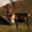

In [36]:
img

In [37]:
y_train_np = targets_train.numpy() 
y_train_np.shape

the_set = np.unique(  y_train_np  )
the_set

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

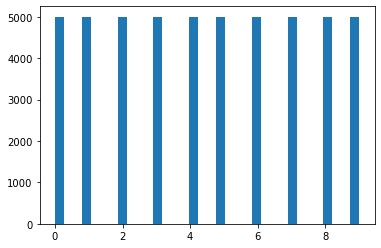

In [38]:
_ = plt.hist( targets_train.numpy(), bins="auto" )
plt.show()

In [39]:
dataset_test = []
labels_test  = []
targets_test = []

In [48]:
for folder in os.listdir(raw_data_test):
    for image in os.listdir(os.path.join(raw_data_test, folder)):
        if folder not in labels_test:
            labels_test.append(folder)
        targets_test.append(labels_test.index(folder))
        
        img_arr = imageio.imread(os.path.join(raw_data_test, folder, image), pilmode="RGB")
        
        img = torch.from_numpy(img_arr).permute(2, 0, 1).float()
        img /= 255
        
        dataset_test.append(img)

In [49]:
data_test = torch.stack(dataset_test)
targets_test = torch.Tensor(targets_test).type(torch.LongTensor)

torch.save((data_test, targets_test, labels_test), "InClass_CIFAR10_data_test")

In [50]:
data_test.shape

torch.Size([10000, 3, 32, 32])

In [51]:
targets_test.shape

torch.Size([10001])

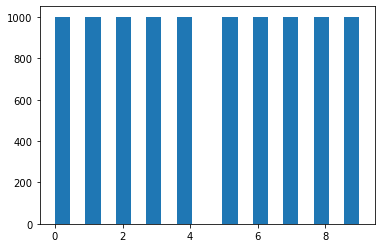

In [53]:
_ = plt.hist( targets_test.numpy(), bins="auto" )
plt.show()

In [54]:
X_train = data_train
y_train = targets_train

In [55]:
X_test = data_test
y_test = targets_test

In [56]:
X_train.shape[0]

50000

In [57]:
y_train[30000].item()

6

In [58]:
X_train[78]

tensor([[[0.0863, 0.0824, 0.0824,  ..., 0.0980, 0.0157, 0.0157],
         [0.0784, 0.0824, 0.0745,  ..., 0.3137, 0.2039, 0.1059],
         [0.0706, 0.0706, 0.0667,  ..., 0.6157, 0.3922, 0.1490],
         ...,
         [0.1176, 0.1294, 0.1294,  ..., 0.1686, 0.2000, 0.1529],
         [0.1373, 0.1373, 0.1490,  ..., 0.1412, 0.2235, 0.1804],
         [0.1373, 0.1373, 0.1451,  ..., 0.1765, 0.2157, 0.1490]],

        [[0.4588, 0.4627, 0.4667,  ..., 0.4784, 0.4588, 0.4941],
         [0.4588, 0.4627, 0.4706,  ..., 0.6039, 0.5490, 0.4784],
         [0.4510, 0.4549, 0.4627,  ..., 0.7804, 0.6000, 0.3765],
         ...,
         [0.1137, 0.1176, 0.1176,  ..., 0.1294, 0.1608, 0.1137],
         [0.1216, 0.1216, 0.1216,  ..., 0.0863, 0.1686, 0.1255],
         [0.1137, 0.1137, 0.1137,  ..., 0.1176, 0.1529, 0.0863]],

        [[0.6314, 0.6392, 0.6510,  ..., 0.6941, 0.6941, 0.7412],
         [0.6275, 0.6392, 0.6510,  ..., 0.7490, 0.7059, 0.6510],
         [0.6196, 0.6314, 0.6431,  ..., 0.8353, 0.6706, 0.

In [59]:
CIFAR_train_list = [  ( X_train[i],  y_train[i].item() )  for i in range( X_train.shape[0]   )  ]

In [60]:
CIFAR_test_list = [  ( X_test[i],  y_test[i].item() )  for i in range( X_test.shape[0]   )  ]

In [61]:
batch_size = 16

In [62]:
train_dl = torch.utils.data.DataLoader( CIFAR_train_list, batch_size=batch_size, shuffle=True  )

In [63]:
test_dl = torch.utils.data.DataLoader( CIFAR_test_list, batch_size=10000, shuffle=True  )

In [64]:
32*32*3

3072

In [65]:
class MLP_net(nn.Module):
    ## init the class
    def __init__(self):
        super().__init__()
        
        self.linear1 = nn.Linear( 32*32*3 ,20)
        self.act1    = nn.Sigmoid()
        self.linear2 = nn.Linear(20 , 10)
        self.act2    = nn.Softmax(dim=1)
        
    ## perform inference
    def forward(self, x):
        
        x            = self.linear1(x)
        x            = self.act1(x)
        x            = self.linear2(x)
        y_pred       = self.act2(x)
        
        return y_pred

In [66]:
def training_loop( N_Epochs, model, loss_fn, opt ):
    for epoch in range(N_Epochs):
        for xb, yb in train_dl:
            
            xb = xb.view(  (16, -1 ) )
            
            y_pred = model(xb)
            
            loss = loss_fn(y_pred, yb)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
        
        if epoch % 5 == 0:
            print(epoch, "loss=", loss)

In [75]:
N_Epochs      = 100
learning_rate = 0.001

In [76]:
model = MLP_net()

opt = torch.optim.Adam(  model.parameters(), lr=learning_rate  )

loss_fn = nn.CrossEntropyLoss()

In [81]:
training_loop( N_Epochs, model, loss_fn, opt )

0 loss= tensor(1.9549, grad_fn=<NllLossBackward0>)
5 loss= tensor(2.0823, grad_fn=<NllLossBackward0>)
10 loss= tensor(2.1121, grad_fn=<NllLossBackward0>)
15 loss= tensor(1.9090, grad_fn=<NllLossBackward0>)
20 loss= tensor(2.1489, grad_fn=<NllLossBackward0>)
25 loss= tensor(2.2223, grad_fn=<NllLossBackward0>)
30 loss= tensor(2.2523, grad_fn=<NllLossBackward0>)
35 loss= tensor(1.9209, grad_fn=<NllLossBackward0>)
40 loss= tensor(2.0295, grad_fn=<NllLossBackward0>)
45 loss= tensor(2.0096, grad_fn=<NllLossBackward0>)
50 loss= tensor(2.1753, grad_fn=<NllLossBackward0>)
55 loss= tensor(1.7957, grad_fn=<NllLossBackward0>)
60 loss= tensor(2.1945, grad_fn=<NllLossBackward0>)
65 loss= tensor(1.9577, grad_fn=<NllLossBackward0>)
70 loss= tensor(1.9737, grad_fn=<NllLossBackward0>)
75 loss= tensor(2.0275, grad_fn=<NllLossBackward0>)
80 loss= tensor(1.9707, grad_fn=<NllLossBackward0>)
85 loss= tensor(2.1951, grad_fn=<NllLossBackward0>)
90 loss= tensor(1.9665, grad_fn=<NllLossBackward0>)
95 loss= tenso

In [82]:
def print_metrics_function(y_test, y_pred):
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print("Confusion Matrix:")
    print(confmat)
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('F1-measure: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))

In [83]:
with torch.no_grad():
    for x_real, y_real in test_dl:
        
        batch_size = x_real.shape[0]
        
        x_real = x_real.view(  (batch_size, -1 ) )
        
        y_pred = model(  x_real  )
        
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function(y_real, preds)

Accuracy: 0.05
Confusion Matrix:
[[135  33  21  22  38  78 166  99  49 360]
 [112  45  17  36  46 117 164 213  69 181]
 [ 90   8  66  32 146 512  33  47  41  25]
 [ 70  41  26  22  31  14 533  73  80 110]
 [ 98 140  59  32  60  64 158  71 226  92]
 [124 229  35  35  72  58 151  70 129  97]
 [ 37  10  96  54 576 149  24  16  33   5]
 [ 52  18 194 452  83  68  55  19  42  17]
 [523  48  68  30  33  49  53  36  48 112]
 [ 83  11 486 151  89  68  56  10  32  13]]
Precision: 0.049
Recall: 0.049
F1-measure: 0.048
